<a href="https://colab.research.google.com/github/chi468/ad_click_predict/blob/master/kakao_ad_click_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#카카오 인터뷰 전 사전과제
#3번문제 광고 클릭률 예측

In [0]:
#캐글의 클릭률 예측 - 모바일 광고 클릭 여부 예측
#위 대회의 데이터를 가져와서 현재 문제 상황에 맞게 수정하여 사용
#출처 : https://www.kaggle.com/c/avazu-ctr-prediction/data?select=train.gz

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
  from google.colab import files
#  files.upload()

In [7]:
#data set 생성
#캐글의 데이터를 현재 문제 상황에 맞게 수정
#위의 데이터는 6시간분의 데이터이므로 문제 상황처럼 30일간의 데이터로 변경

#train = pd.read_csv('train_ad (1).csv')
#set_hour = set(train['hour'])

#10분단위로 데이터 구간 생성
#하루는 24시간이므로 24*6 = 144 개의 구간
_one_day = 144

dayList = []
timeList = []
for day in range(1,33):
  for hour in range(24):
    for min in range(6):
      #01일부터 33일까지의 데이터 생성
      dayList.append(day)
      timeList.append(hour*100 + min*10)
"""
stampList = []
viewList = [0 for i in range(24*33*6)]
clickList = [0 for i in range(24*33*6)]


#광고 번호가 'a99f214a' 인 광고에 대해서만 진행
#해당 광고의 시간대별 총 노출수에서 클릭수를 나누어 시간대별 클릭률을 계산

for i in range(6):
  index = 0
  h = list(set_hour)[i]
  for _, tmp in train[train['hour']==h][['ad_id','click']].iterrows():
    timeIndex = index%(24*6*5) + i * (24*6*5)
    stampList.append(timeList[timeIndex])
    index+=1

rateList = [float(clickList[i])/viewList[i]*100 for i in range(len(clickList))]

#train['hour'] = stampList
"""

"\nstampList = []\nviewList = [0 for i in range(24*33*6)]\nclickList = [0 for i in range(24*33*6)]\n\n\n#광고 번호가 'a99f214a' 인 광고에 대해서만 진행\n#해당 광고의 시간대별 총 노출수에서 클릭수를 나누어 시간대별 클릭률을 계산\n\nfor i in range(6):\n  index = 0\n  h = list(set_hour)[i]\n  for _, tmp in train[train['hour']==h][['ad_id','click']].iterrows():\n    timeIndex = index%(24*6*5) + i * (24*6*5)\n    stampList.append(timeList[timeIndex])\n    index+=1\n\nrateList = [float(clickList[i])/viewList[i]*100 for i in range(len(clickList))]\n\n#train['hour'] = stampList\n"

In [0]:
#'a99f214a'번 광고의 시간대별 클릭률 데이터 시각화
df_clickRate = {'day':dayList, 'timestamp': timeList }

df_clickRate = pd.DataFrame(df_clickRate)
print(df_clickRate.tail(50))
df_clickRate.head(100).plot(x='timestamp', y='rate')
plt.title("rate_graph")
plt.xlabel("timestamp",color='white')
plt.ylabel("rate",color='white')
#plt.show()


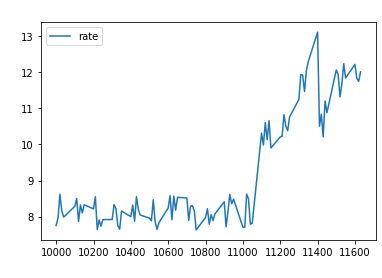

In [200]:
#위의 데이터는 LSTM 모델로 Learning 진행에 부적합
#합리적인 데이터 생성
#치킨 광고라 가정
#세부조건 세팅
import math
import random
reasonable_rate = []
dtsList = []
for index,col in df_clickRate.iterrows():
  day = col['day']
  ts = col['timestamp']
  hour = col['timestamp']/100
  min = col['timestamp'] %100
  new_rate = random.random() + 10
  #식사시간 11~14시 / 18시~21시
  if (ts >= 1100 and ts <= 1400) or (ts >= 1800 and ts <= 2100):
    new_rate += (ts/100)*(ts/100) /60
  #시간이 늦어질 수록 증가
  new_rate += math.tanh(hour-14) * 2
  #여름이 다가올수록 많이
  new_rate += math.tanh(day-15)
  #7일씩 주기성
  new_rate += math.cos(np.pi * 2 / 7 * day)  
  reasonable_rate.append(new_rate)
  dayTime = day * 10000 + ts
  dtsList.append(dayTime) 
df_clickRate['rate'] = reasonable_rate
df_clickRate['dayTime'] = dtsList

df_clickRate = pd.DataFrame(df_clickRate)
df_clickRate.head(100).plot(x='dayTime', y='rate')
plt.title("rate_graph",color = 'white')
plt.xlabel("timestamp",color='white')
plt.ylabel("rate",color='white')
plt.show()


In [0]:
#합리적인 데이터 생성 2
#Transfer Learning을 위한 데이터
#수영복 광고라 가정
#세부조건 세팅
import math
import random
reasonable_rate = []
dtsList = []
for index,col in df_clickRate.iterrows():
  day = col['day']
  ts = col['timestamp']
  hour = col['timestamp']/100
  min = col['timestamp'] %100
  new_rate = random.random() + 10
  #퇴근 후 시간대 클릭률 증가 18시~24시
  if (ts >= 1800 and ts <= 2400):
    new_rate += math.sqrt(ts/100)
  #낮시간대에 증가
  new_rate += -(hour-14)*(hour-14)/20 + 10
  #여름이 다가올수록 많이
  new_rate += 2*math.exp(day/10)
  reasonable_rate.append(new_rate)
  dayTime = day * 10000 + ts
  dtsList.append(dayTime)
df_clickRate['rate2'] = reasonable_rate



In [202]:
#합리적인 데이터 생성 3
#Transfer Learning을 위한 데이터
#떡볶이 광고라 가정
#세부조건 세팅
import math
import random


dayList = []

timeList = []
for day in range(32,62):
  for hour in range(24):
    for min in range(6):
      #32일부터 61일까지의 데이터 생성
      dayList.append(day)
      timeList.append(hour*100 + min*10)
df_testClickRate = pd.DataFrame({'day':dayList,'timestamp':timeList})

reasonable_rate = []
dtsList = []
for index,col in df_testClickRate.iterrows():
  day = col['day']
  ts = col['timestamp']
  hour = col['timestamp']/100
  min = col['timestamp'] %100
  new_rate = random.random() + 15
  #밥시간 11~15시 / 18시~21시
  if (ts >= 1100 and ts <= 1500) or (ts >= 1800 and ts <= 2100):
    new_rate += (ts/100)*(ts/100) /60

  #여름이 다가올수록 적게
  new_rate -= 5*math.tanh(day-15)
  #7일씩 주기성
  new_rate += math.cos(np.pi * 2 / 7 * day)  
  reasonable_rate.append(new_rate)
  dayTime = day * 10000 + ts
  dtsList.append(dayTime)
df_testClickRate['rate3'] = reasonable_rate
print(df_testClickRate)

      day  timestamp      rate3
0      32          0   9.993097
1      32         10   9.587816
2      32         20   9.249917
3      32         30  10.055949
4      32         40   9.600656
...   ...        ...        ...
4315   61       2310  10.565718
4316   61       2320  10.659960
4317   61       2330  10.713091
4318   61       2340  10.236643
4319   61       2350  10.203042

[4320 rows x 3 columns]


In [0]:
#Train Data로 넣을 전날 같은 시간 데이터값 생성
beforeRateList3 = []
for i in range(_one_day):
  beforeRateList3.append(0)

for r in df_testClickRate['rate3']:
  beforeRateList3.append(r)

for i in range(_one_day):
  beforeRateList3.pop()  

df_testClickRate['beforeRate3'] = beforeRateList3


In [0]:
#Train Data로 넣을 전날 같은 시간 데이터값 생성
#befoeRateList 생성
#이전날 같은 시간의 클릭률을 넣어줌
#첫 날은 모두 0으로 설정
beforeRateList = {}
rates = ['rate','rate2']
beforeRates = [ 'beforeRate','beforeRate2']
for rate in (rates):
  beforeRateList[rate] = []

for rate in rates:
  for i in range(_one_day):
    beforeRateList[rate].append(0)

for _,r in df_clickRate[rates].iterrows() :
    for rate in rates:
      beforeRateList[rate].append(r[rate])

for rate in rates:
  for i in range(_one_day):
    beforeRateList[rate].pop()

df_clickRate['beforeRate'] = beforeRateList['rate']
df_clickRate['beforeRate2'] = beforeRateList['rate2']



In [0]:
# 클릭률 데이터 저장
#df_clickRate.to_csv('clickRate.csv')
#files.download('clickRate.csv')

In [0]:
# from google.colab import files
# files.upload()

In [0]:
#df_clickRate = pd.read_csv('clickRate.csv')

In [0]:
#광고 클릭률 변화 그래프 27일분을 통해 이후 3일분의 광고 클릭률 예측 진행
#시계열 데이터이므로 RNN모델 중 LSTM모델 이용

In [0]:
X_train = df_clickRate[['beforeRate']]
y_columns = df_clickRate['rate']

X_trainLen = X_train.shape[0]

X_columnNum = X_train.shape[1]

# standardization을 위해 평균과 표준편차 구하기
MEAN = X_train.mean()
STD = X_train.std()

# 표준편차가 0일 경우 대비하여 1e-07 추가
X_train = (X_train - MEAN) / (STD + 1e-07)
#print(X_train)

In [0]:
# RNN 모델에 입력 할 수 있는 시계열 형태로 데이터 변환 함수생성
from tqdm.notebook import tqdm

def convert_to_timeseries(df, interval):
    sequence_list = []
    target_list = []
    
    for i in tqdm(range(df.shape[0] - interval)):
        sequence_list.append(np.array(df.iloc[i:i+interval,:-1]))
        target_list.append(df.iloc[i+interval,-1])
    
    sequence = np.array(sequence_list)
    target = np.array(target_list)
    
    return sequence, target

In [211]:
# t시점 이전 120분의 데이터로 t시점의 온도를 추정할 수 있는 학습데이터 형성
_interval = 6;

# t시점 이전 120분의 데이터로 t시점의 온도를 추정할 수 있는 학습데이터 형성
sequence = np.empty((0,_interval, X_columnNum))
target = np.empty((0,))
        
concat = pd.concat([X_train,df_clickRate['rate']], axis = 1)

_sequence, _target = convert_to_timeseries(concat.head(_one_day*32), interval = _interval)


sequence = np.vstack((sequence, _sequence))
target = np.hstack((target, _target))
print(target.shape)


(4602,)


In [0]:
# lstm 모델 구축하기
import tensorflow as tf

lstm_model = tf.keras.models.Sequential([
                                      
  tf.keras.layers.LSTM(128, input_shape=sequence.shape[-2:]),

  
  tf.keras.layers.Dense(128,activation='relu'),
  
  tf.keras.layers.Dense(1)

])

adam = tf.keras.optimizers.Adam(learning_rate=0.001)
lstm_model.compile(optimizer=adam, loss='mse')

In [0]:
# loss가 어떤 값 미만으로 떨어지면 학습 종료 시키는 기능
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if(logs.get('loss') < 1):
            print('\n Loss is under 3, cancelling training')
            self.model.stop_training = True

In [0]:
callbacks = myCallback()

In [215]:
dataX = sequence
dataY = target
print(target.shape)
data_dim = 1
train_size = int(_one_day*30)
test_size = len(dataY) - train_size
trainX = np.array(dataX[0:train_size])
testX = np.array(dataX[train_size:len(dataX)])
trainY = np.array(dataY[0:train_size])
testY = np.array(dataY[train_size-_interval:])
print(train_size,dataY.shape)
print(testY.shape)
print(dataY)
#X = tf.Variable(tf.zeros(shape = (None,seq_length,data_dim)),dtype=float32)
#Y = tf.Variable(tf.zeros(shape=(None,1)),dtype=float32)

(4602,)
4320 (4602,)
(288,)
[ 8.28849521  8.50162257  7.86268099 ... 12.19630204 12.13469831
 12.23208563]


In [216]:
# 모델 학습
lstm_model.fit(    
    sequence, target,
    epochs=100,
    batch_size=64,
    verbose=2,
    shuffle=False,
   callbacks = [callbacks]
)

Epoch 1/100
72/72 - 1s - loss: 61.7175
Epoch 2/100
72/72 - 1s - loss: 9.1579
Epoch 3/100
72/72 - 1s - loss: 5.7625
Epoch 4/100
72/72 - 1s - loss: 5.0294
Epoch 5/100
72/72 - 1s - loss: 4.2317
Epoch 6/100
72/72 - 1s - loss: 3.8166
Epoch 7/100
72/72 - 1s - loss: 3.5913
Epoch 8/100
72/72 - 1s - loss: 3.4106
Epoch 9/100
72/72 - 1s - loss: 3.2943
Epoch 10/100
72/72 - 1s - loss: 3.1868
Epoch 11/100
72/72 - 1s - loss: 3.0868
Epoch 12/100
72/72 - 1s - loss: 3.0187
Epoch 13/100
72/72 - 1s - loss: 2.9633
Epoch 14/100
72/72 - 1s - loss: 2.9092
Epoch 15/100
72/72 - 1s - loss: 2.8571
Epoch 16/100
72/72 - 1s - loss: 2.8119
Epoch 17/100
72/72 - 1s - loss: 2.7717
Epoch 18/100
72/72 - 1s - loss: 2.7350
Epoch 19/100
72/72 - 1s - loss: 2.7005
Epoch 20/100
72/72 - 1s - loss: 2.6706
Epoch 21/100
72/72 - 1s - loss: 2.6447
Epoch 22/100
72/72 - 1s - loss: 2.6213
Epoch 23/100
72/72 - 1s - loss: 2.5923
Epoch 24/100
72/72 - 1s - loss: 2.5686
Epoch 25/100
72/72 - 1s - loss: 2.5469
Epoch 26/100
72/72 - 1s - loss: 2

In [0]:
#MAD(절대 평균 오차) 생성함수
def cal_res(pred,test):
  res = 0.
  for i in range(len(pred)):
     res += abs((pred[i]-test[i]))
  return res / len(pred)

In [218]:
testX, _ = convert_to_timeseries(pd.concat([X_train.tail(_one_day*2+_interval),df_clickRate['rate'].tail(_one_day*2+_interval)],axis=1), interval = _interval)

y_pred = pd.DataFrame(lstm_model.predict(testX))

MAD(Mean Absolute Diviation)[0.6367559]


Text(0, 0.5, 'prob')

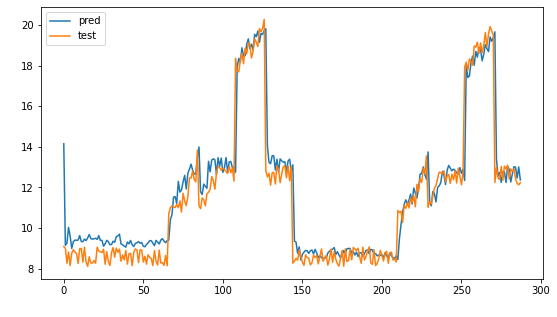

In [219]:
testY = np.array(testY)
y_pred = np.array(y_pred)

print('MAD(Mean Absolute Diviation)'+str(cal_res(y_pred,testY)))
plt.figure(figsize=(9,5))
plt.plot(y_pred)
plt.plot(testY)
plt.legend(['pred','test'])
plt.xlabel('time',color = 'white')
plt.ylabel('prob',color = 'white')



In [220]:
"""
from keras import backend as K

#손실함수 4제곱으로 직접 정의
def msse(y_pred, y_true):
    loss = K.mean((y_true-y_pred)**4)
 
    return loss
"""

'\nfrom keras import backend as K\n\n#손실함수 4제곱으로 직접 정의\ndef msse(y_pred, y_true):\n    loss = K.mean((y_true-y_pred)**4)\n \n    return loss\n'

In [221]:
"""
model = Sequential()
model.add(Dense(64, input_dim=3 , activation='relu'))
model.add(Dense(32, activation='softmax'))
model.add(Dense(1,activation='relu'))
model.compile(loss='mse' , optimizer = adam)

history = model.fit(X_train,y_train, epochs = 100, batch_size=64)
"""

"\nmodel = Sequential()\nmodel.add(Dense(64, input_dim=3 , activation='relu'))\nmodel.add(Dense(32, activation='softmax'))\nmodel.add(Dense(1,activation='relu'))\nmodel.compile(loss='mse' , optimizer = adam)\n\nhistory = model.fit(X_train,y_train, epochs = 100, batch_size=64)\n"

In [222]:
"""
y_pred = pd.DataFrame(model.predict(X_train))
plt.figure(figsize=(15,10))
plt.plot(np.array(y_train))
plt.plot(y_pred)
plt.legend(['test','pred'])
print(testY)
print(y_pred)
"""

"\ny_pred = pd.DataFrame(model.predict(X_train))\nplt.figure(figsize=(15,10))\nplt.plot(np.array(y_train))\nplt.plot(y_pred)\nplt.legend(['test','pred'])\nprint(testY)\nprint(y_pred)\n"

In [0]:
#문제2번 새로운 광고 2일 데이터로 나머지 데이터 예측
#Transfer Learning 이용하여 fine Tuning 진행

     index       rate      rate2      rate3
0        0   9.085893  55.309347   9.993097
1        1   9.008590  55.320539   9.587816
2        2   8.268069  55.000292   9.249917
3        3   8.821298  55.725092  10.055949
4        4   8.152215  56.029258   9.600656
..     ...        ...        ...        ...
283    283  12.904948  70.665742  10.304975
284    284  12.437387  70.130167  10.103027
285    285  12.196302  70.194932  10.666925
286    286  12.134698  69.528104  10.215167
287    287  12.232086  70.119909  10.377377

[288 rows x 4 columns]


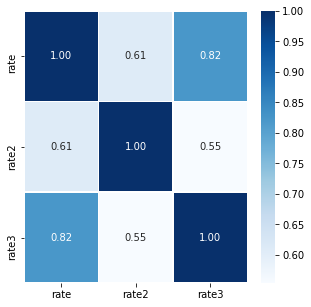

In [224]:
import seaborn as sns    

#2번문제
#광고별 2일간 연관도 분석
#새로 들어온 3번 광고의 2일치 데이터와
#1번 광고의 해당날짜 예측 데이터의 상관관계를 비교
tmp = {}
tmp['rate'] = np.array(df_clickRate['rate'].tail(_one_day*2))
tmp['rate2'] = np.array(df_clickRate['rate2'].tail(_one_day*2))
tmp['rate3'] =  df_testClickRate['rate3'].head(_one_day*2)
print(pd.DataFrame(tmp).reset_index())
corr = pd.DataFrame(tmp).corr()

plt.figure(figsize=(5,5))
sns.heatmap(data = corr, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [0]:
X_test = df_testClickRate['beforeRate3'].head(_one_day*3).tail(_one_day)
testY = df_testClickRate['beforeRate3'].head(_one_day*2).tail(_one_day)
X_train = df_testClickRate['beforeRate3'].head(_one_day*2)
# train set에서 도출된 평균과 표준편차로 standardization 실시 
#X_test = (X_test - MEAN) / (STD + 1e-07)
# convert_to_timeseries 함수를 쓰기 위한 dummy feature 생성

# train과 test 기간을 합쳐서 120분 간격으로 학습데이터 재구축
X_train.append(X_test)
tmp = {}
tmp['beforeRate3'] = X_train
tmp = pd.DataFrame(tmp)
print(tmp)
tmp['dummy'] = 0
X_test, _ = convert_to_timeseries(tmp, interval=_interval)
print(X_test)

X_test = X_test[-_one_day:,:,:]



In [226]:
# LSTM 레이어는 고정
lstm_model.layers[0].trainable = False
# fine tuning 할 때 사용할 학습데이터 생성 (Y18)
finetune_X, finetune_y = convert_to_timeseries(pd.concat([df_testClickRate['beforeRate3'].head(_one_day*2), df_testClickRate['rate3'].head(_one_day*2)], axis = 1), interval=_interval)

# LSTM 레이어는 고정 시켜두고, DNN 레이어에 대해서 fine tuning 진행 (Transfer Learning)
finetune_history = lstm_model.fit(
            finetune_X, finetune_y,
            epochs=100,
            batch_size=64,
            shuffle=False,
            verbose = 0)


MAD(Mean Absolute Deviation) :[0.8635099]


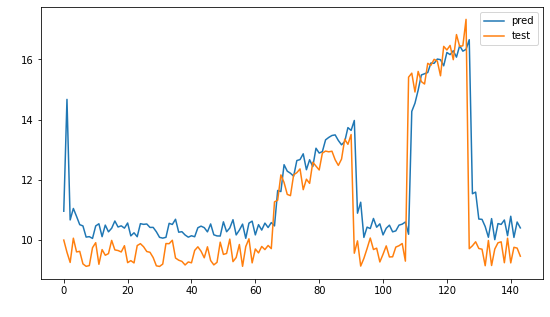

In [227]:
# 예측하기

finetune_pred = lstm_model.predict(X_test)
testY = np.array(testY)
finetune_pred = np.array(finetune_pred)

plt.figure(figsize=(9,5))
plt.plot(finetune_pred)
plt.plot(testY)
plt.xlabel('time',color = 'white')
plt.ylabel('prob',color = 'white')
plt.legend(['pred','test'])

#절대 평균 오차(MAD)
print('MAD(Mean Absolute Deviation) :' + str(cal_res(finetune_pred,testY)))